In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/garments_worker_productivity.csv")
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [ ]:
df.shape

(1197, 15)

This means there are 15 features. Out of these 15 features, 1 is target feature. Rest 14 are my input features.

There are 1197 data points in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

The Wip is having 506 null Values, total we have 1197 data points and WIP has 506 null points this need to be tackled, this param work in progress is very important fo this problem

In [ ]:
# lets impute the missing values , as it is work in progress so it is very like to fill the missing values with the mean WIP 
df['wip'].fillna(df['wip'].mean(), inplace = True)

In [ ]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,1190.465991,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,1190.465991,1800,0,0.0,0,0,15.0,0.505889


In [ ]:
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

All missing values are filled up, no missing values

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
a=df['date'][0]

In [ ]:
def date2month(x):
  return x.month

In [ ]:
def date2year(x):
  return x.year

In [ ]:
df['month']=df['date'].apply(date2month)
df.head(20)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725,1
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500,1
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570,1
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570,1
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382,1
5,2015-01-01,Quarter1,sweing,Thursday,7,0.80,25.90,984.000000,6720,38,0.0,0,0,56.0,0.800125,1
6,2015-01-01,Quarter1,finishing,Thursday,2,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.755167,1
7,2015-01-01,Quarter1,sweing,Thursday,3,0.75,28.08,795.000000,6900,45,0.0,0,0,57.5,0.753683,1
8,2015-01-01,Quarter1,sweing,Thursday,2,0.75,19.87,733.000000,6000,34,0.0,0,0,55.0,0.753098,1
9,2015-01-01,Quarter1,sweing,Thursday,1,0.75,28.08,681.000000,6900,45,0.0,0,0,57.5,0.750428,1


In [ ]:
df['month']=df['date'].apply(date2month)
df.tail(20)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
1177,2015-03-11,Quarter2,finishing,Wednesday,1,0.75,3.94,1190.465991,1920,0,0.0,0,0,8.0,0.812625,3
1178,2015-03-11,Quarter2,sweing,Wednesday,12,0.80,15.26,470.000000,4080,63,0.0,0,0,34.0,0.800402,3
1179,2015-03-11,Quarter2,sweing,Wednesday,3,0.80,30.10,735.000000,6960,63,0.0,0,1,58.0,0.800072,3
1180,2015-03-11,Quarter2,sweing,Wednesday,11,0.80,11.41,560.000000,3420,50,0.0,0,0,58.0,0.800035,3
1181,2015-03-11,Quarter2,finishing,Wednesday,3,0.80,4.60,1190.465991,1920,0,0.0,0,0,8.0,0.786632,3
1182,2015-03-11,Quarter2,finishing,Wednesday,5,0.70,3.94,1190.465991,1440,0,0.0,0,0,12.0,0.758850,3
1183,2015-03-11,Quarter2,sweing,Wednesday,10,0.75,21.82,1674.000000,6000,34,0.0,0,0,50.0,0.750608,3
1184,2015-03-11,Quarter2,sweing,Wednesday,9,0.75,18.79,290.000000,5040,45,0.0,0,0,52.0,0.750347,3
1185,2015-03-11,Quarter2,sweing,Wednesday,2,0.75,16.10,971.000000,5400,45,0.0,0,1,45.0,0.750141,3
1186,2015-03-11,Quarter2,sweing,Wednesday,1,0.75,26.82,1322.000000,7080,45,0.0,0,0,59.0,0.750051,3


In [ ]:
df['year']=df['date'].apply(date2year)
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,year
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725,1,2015
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500,1,2015
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570,1,2015
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570,1,2015
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382,1,2015


In [ ]:
df['year']=df['date'].apply(date2year)
df.tail()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,year
1192,2015-03-11,Quarter2,finishing,Wednesday,10,0.75,2.9,1190.465991,960,0,0.0,0,0,8.0,0.628333,3,2015
1193,2015-03-11,Quarter2,finishing,Wednesday,8,0.70,3.9,1190.465991,960,0,0.0,0,0,8.0,0.625625,3,2015
1194,2015-03-11,Quarter2,finishing,Wednesday,7,0.65,3.9,1190.465991,960,0,0.0,0,0,8.0,0.625625,3,2015
1195,2015-03-11,Quarter2,finishing,Wednesday,9,0.75,2.9,1190.465991,1800,0,0.0,0,0,15.0,0.505889,3,2015
1196,2015-03-11,Quarter2,finishing,Wednesday,6,0.70,2.9,1190.465991,720,0,0.0,0,0,6.0,0.394722,3,2015


Date Column is not required any more so dropping it

In [ ]:
df=df.drop(columns='date')

In [ ]:
columns=df["year"]

In [ ]:
max=columns.max()

In [ ]:
max

2015

In [ ]:
min=columns.min()
min

2015

In [ ]:
df=df.drop(columns='year')

In [ ]:
df

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725,1
1,Quarter1,finishing,Thursday,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500,1
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570,1
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570,1
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,1190.465991,960,0,0.0,0,0,8.0,0.628333,3
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625,3
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625,3
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,1190.465991,1800,0,0.0,0,0,15.0,0.505889,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   float64
 13  actual_productivity    1197 non-null   float64
 14  month                  1197 non-null   int64  
dtypes: f

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
mappings = list()

encoder = LabelEncoder()

for column in range(len(df.columns)):
    df[df.columns[column]] = encoder.fit_transform(df[df.columns[column]])
    mappings_dict = {index: label for index, label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)

In [ ]:
df

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
0,0,2,3,7,8,41,327,101,37,0,0,0,57,798,0
1,0,1,3,0,7,2,377,9,0,0,0,0,5,715,0
2,0,2,3,10,8,9,246,44,20,0,0,0,25,586,0
3,0,2,3,11,8,9,246,44,20,0,0,0,25,586,0
4,0,2,3,5,8,40,366,20,20,0,0,0,51,567,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,0,5,9,7,0,377,9,0,0,0,0,5,245,2
1193,1,0,5,7,6,1,377,9,0,0,0,0,5,241,2
1194,1,0,5,6,5,1,377,9,0,0,0,0,5,241,2
1195,1,0,5,8,7,0,377,19,0,0,0,0,11,141,2


In [ ]:
df.isnull().sum()

quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
month                    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   quarter                1197 non-null   int64
 1   department             1197 non-null   int64
 2   day                    1197 non-null   int64
 3   team                   1197 non-null   int64
 4   targeted_productivity  1197 non-null   int64
 5   smv                    1197 non-null   int64
 6   wip                    1197 non-null   int64
 7   over_time              1197 non-null   int64
 8   incentive              1197 non-null   int64
 9   idle_time              1197 non-null   int64
 10  idle_men               1197 non-null   int64
 11  no_of_style_change     1197 non-null   int64
 12  no_of_workers          1197 non-null   int64
 13  actual_productivity    1197 non-null   int64
 14  month                  1197 non-null   int64
dtypes: int64(15)
memory usage: 140.4 KB


In [ ]:
df['targeted_productivity']

0       8
1       7
2       8
3       8
4       8
       ..
1192    7
1193    6
1194    5
1195    7
1196    6
Name: targeted_productivity, Length: 1197, dtype: int64

In [ ]:
# splitting the dataset

X=df.drop(columns='targeted_productivity')
y=df['targeted_productivity']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train.shape

(837, 14)

In [ ]:
y_train.shape

(837,)

In [ ]:
X_test.shape

(360, 14)

In [ ]:
y_test.shape

(360,)

In [ ]:
X_train

,quarter,department,day,team,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
305,2,2,2,8,41,449,44,20,0,0,0,57,516,0
618,0,2,3,1,32,426,94,39,0,0,0,52,861,1
320,2,1,0,4,4,377,14,0,0,0,0,5,817,0
223,1,2,4,7,40,387,127,25,0,0,0,53,667,0
1045,0,0,4,5,0,377,38,0,0,0,0,5,28,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,2,2,5,9,21,334,74,0,7,6,1,39,26,1
761,1,2,1,10,9,279,24,2,0,0,2,49,213,1
849,2,0,3,5,0,377,54,0,0,0,0,14,496,1
6,0,1,3,1,2,377,9,0,0,0,0,5,475,0


In [ ]:
X_train

,quarter,department,day,team,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
305,2,2,2,8,41,449,44,20,0,0,0,57,516,0
618,0,2,3,1,32,426,94,39,0,0,0,52,861,1
320,2,1,0,4,4,377,14,0,0,0,0,5,817,0
223,1,2,4,7,40,387,127,25,0,0,0,53,667,0
1045,0,0,4,5,0,377,38,0,0,0,0,5,28,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,2,2,5,9,21,334,74,0,7,6,1,39,26,1
761,1,2,1,10,9,279,24,2,0,0,2,49,213,1
849,2,0,3,5,0,377,54,0,0,0,0,14,496,1
6,0,1,3,1,2,377,9,0,0,0,0,5,475,0


In [ ]:
from sklearn.preprocessing import StandardScaler # To standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam, RMSprop

In [ ]:
model = Sequential()
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='Adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=32,epochs=100)

Epoch 1/100
27/27 [==============================] - 2s 20ms/step - loss: 51.3371 - val_loss: 48.8028
Epoch 2/100
27/27 [==============================] - 0s 4ms/step - loss: 46.5435 - val_loss: 48.1007
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 46.0573 - val_loss: 47.6963
Epoch 4/100
27/27 [==============================] - 0s 4ms/step - loss: 45.6425 - val_loss: 47.2235
Epoch 5/100
27/27 [==============================] - 0s 4ms/step - loss: 45.0094 - val_loss: 46.2338
Epoch 6/100
27/27 [==============================] - 0s 4ms/step - loss: 43.3680 - val_loss: 43.3230
Epoch 7/100
27/27 [==============================] - 0s 4ms/step - loss: 38.1964 - val_loss: 33.9284
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 23.6228 - val_loss: 12.6375
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 6.6165 - val_loss: 3.5669
Epoch 10/100
27/27 [==============================] - 0s 4ms/step - loss: 3.7903 - val_loss:

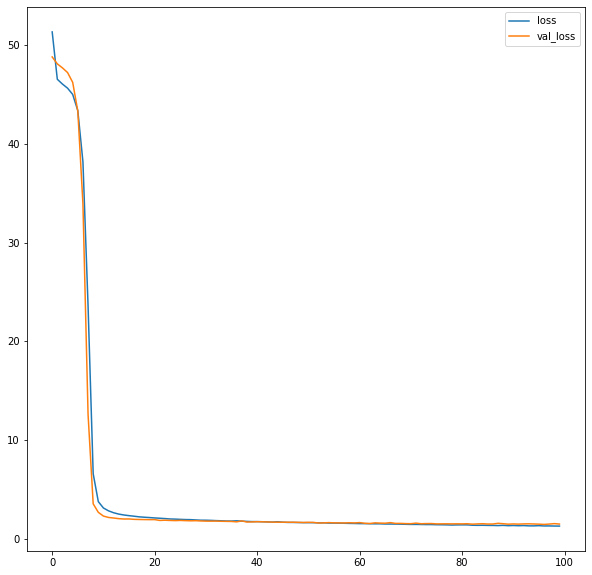

In [ ]:
dfl_adam= pd.DataFrame(model.history.history)
dfl_adam.plot(figsize=(10,10))